In [1]:
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import numpy as np
import warnings
import time
import psutil
from preprecess import *
from SLGCA_sparse import SLGCA_sparse

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
os.environ['R_HOME'] = '/home/luxin1/miniconda3/envs/pytorch/lib/R'

In [3]:
n_clusters = 7
file_path = '/home/luxin1/ST-DATA/Mouse embryo/'
adata = sc.read_h5ad("/home/luxin1/ST-DATA/Stereo-seq-mouse olfactory/Stereo_seq.h5ad")
adata.var_names_make_unique()

In [4]:
model = SLGCA_sparse(
    adata,
    device=device,
    n_top_genes=3000,
    dim_output=64,
    epochs=600,
    learning_rate=0.001,
    weight_decay=1e-5,
    n_neighbors=4,
    gama=0.8,
    beta=0.2
)
adata = model.train()
from utils import clustering
tool = 'mclust'
if tool == 'mclust':
   clustering(adata, n_clusters, method=tool)

Graph constructed!
Building sparse adjacency matrix ...
Begin to train sparse ST data...


  0%|          | 1/600 [00:09<1:30:44,  9.09s/it]

Epoch 0, NaN count in embedding: 0


  0%|          | 2/600 [00:09<38:38,  3.88s/it]  

Epoch 1, NaN count in embedding: 0


  0%|          | 3/600 [00:09<22:00,  2.21s/it]

Epoch 2, NaN count in embedding: 0


  1%|          | 4/600 [00:09<14:12,  1.43s/it]

Epoch 3, NaN count in embedding: 0


  1%|          | 5/600 [00:09<09:49,  1.01it/s]

Epoch 4, NaN count in embedding: 0


  1%|          | 6/600 [00:10<07:13,  1.37it/s]

Epoch 5, NaN count in embedding: 0


  1%|          | 7/600 [00:10<05:34,  1.77it/s]

Epoch 6, NaN count in embedding: 0


  1%|▏         | 8/600 [00:10<04:32,  2.17it/s]

Epoch 7, NaN count in embedding: 0


  2%|▏         | 9/600 [00:10<03:48,  2.59it/s]

Epoch 8, NaN count in embedding: 0
Epoch 9, NaN count in embedding: 0


  2%|▏         | 11/600 [00:11<03:01,  3.24it/s]

Epoch 10, NaN count in embedding: 0


  2%|▏         | 12/600 [00:11<02:51,  3.44it/s]

Epoch 11, NaN count in embedding: 0


  2%|▏         | 13/600 [00:11<02:40,  3.66it/s]

Epoch 12, NaN count in embedding: 0


  2%|▏         | 14/600 [00:12<02:35,  3.78it/s]

Epoch 13, NaN count in embedding: 0


  2%|▎         | 15/600 [00:12<02:26,  3.99it/s]

Epoch 14, NaN count in embedding: 0


  3%|▎         | 16/600 [00:12<02:24,  4.04it/s]

Epoch 15, NaN count in embedding: 0


  3%|▎         | 17/600 [00:12<02:29,  3.91it/s]

Epoch 16, NaN count in embedding: 0


  3%|▎         | 18/600 [00:13<02:28,  3.93it/s]

Epoch 17, NaN count in embedding: 0


  3%|▎         | 19/600 [00:13<02:32,  3.81it/s]

Epoch 18, NaN count in embedding: 0


  3%|▎         | 20/600 [00:13<02:35,  3.74it/s]

Epoch 19, NaN count in embedding: 0


  4%|▎         | 21/600 [00:13<02:30,  3.85it/s]

Epoch 20, NaN count in embedding: 0


  4%|▎         | 22/600 [00:14<02:28,  3.89it/s]

Epoch 21, NaN count in embedding: 0


  4%|▍         | 23/600 [00:14<02:21,  4.08it/s]

Epoch 22, NaN count in embedding: 0


  4%|▍         | 24/600 [00:14<02:17,  4.18it/s]

Epoch 23, NaN count in embedding: 0


  4%|▍         | 25/600 [00:14<02:18,  4.16it/s]

Epoch 24, NaN count in embedding: 0


  4%|▍         | 26/600 [00:15<02:24,  3.98it/s]

Epoch 25, NaN count in embedding: 0


  4%|▍         | 27/600 [00:15<02:20,  4.09it/s]

Epoch 26, NaN count in embedding: 0


  5%|▍         | 28/600 [00:15<02:19,  4.10it/s]

Epoch 27, NaN count in embedding: 0


  5%|▍         | 29/600 [00:15<02:15,  4.21it/s]

Epoch 28, NaN count in embedding: 0


  5%|▌         | 30/600 [00:16<02:13,  4.26it/s]

Epoch 29, NaN count in embedding: 0


  5%|▌         | 31/600 [00:16<02:24,  3.93it/s]

Epoch 30, NaN count in embedding: 0


  5%|▌         | 32/600 [00:16<02:20,  4.05it/s]

Epoch 31, NaN count in embedding: 0


  6%|▌         | 33/600 [00:16<02:09,  4.36it/s]

Epoch 32, NaN count in embedding: 0
Epoch 33, NaN count in embedding: 0


  6%|▌         | 35/600 [00:17<02:12,  4.27it/s]

Epoch 34, NaN count in embedding: 0


  6%|▌         | 36/600 [00:17<02:11,  4.30it/s]

Epoch 35, NaN count in embedding: 0


  6%|▌         | 37/600 [00:17<02:09,  4.36it/s]

Epoch 36, NaN count in embedding: 0


  6%|▋         | 38/600 [00:17<02:11,  4.27it/s]

Epoch 37, NaN count in embedding: 0


  6%|▋         | 39/600 [00:18<02:05,  4.46it/s]

Epoch 38, NaN count in embedding: 0
Epoch 39, NaN count in embedding: 0


  7%|▋         | 41/600 [00:18<02:01,  4.61it/s]

Epoch 40, NaN count in embedding: 0


  7%|▋         | 42/600 [00:18<02:16,  4.08it/s]

Epoch 41, NaN count in embedding: 0


  7%|▋         | 43/600 [00:19<02:17,  4.06it/s]

Epoch 42, NaN count in embedding: 0


  7%|▋         | 44/600 [00:19<02:13,  4.16it/s]

Epoch 43, NaN count in embedding: 0


  8%|▊         | 45/600 [00:19<02:13,  4.15it/s]

Epoch 44, NaN count in embedding: 0


  8%|▊         | 46/600 [00:19<02:16,  4.07it/s]

Epoch 45, NaN count in embedding: 0


  8%|▊         | 47/600 [00:20<02:16,  4.04it/s]

Epoch 46, NaN count in embedding: 0


  8%|▊         | 48/600 [00:20<02:07,  4.34it/s]

Epoch 47, NaN count in embedding: 0
Epoch 48, NaN count in embedding: 0


  8%|▊         | 50/600 [00:20<01:56,  4.72it/s]

Epoch 49, NaN count in embedding: 0
Epoch 50, NaN count in embedding: 0


  9%|▊         | 52/600 [00:21<01:54,  4.80it/s]

Epoch 51, NaN count in embedding: 0
Epoch 52, NaN count in embedding: 0


  9%|▉         | 54/600 [00:21<01:56,  4.68it/s]

Epoch 53, NaN count in embedding: 0


  9%|▉         | 55/600 [00:21<02:02,  4.43it/s]

Epoch 54, NaN count in embedding: 0


  9%|▉         | 56/600 [00:21<02:05,  4.34it/s]

Epoch 55, NaN count in embedding: 0


 10%|▉         | 57/600 [00:22<02:06,  4.29it/s]

Epoch 56, NaN count in embedding: 0


 10%|▉         | 58/600 [00:22<02:08,  4.21it/s]

Epoch 57, NaN count in embedding: 0


 10%|▉         | 59/600 [00:22<02:10,  4.15it/s]

Epoch 58, NaN count in embedding: 0


 10%|█         | 60/600 [00:22<02:08,  4.21it/s]

Epoch 59, NaN count in embedding: 0


 10%|█         | 61/600 [00:23<02:03,  4.38it/s]

Epoch 60, NaN count in embedding: 0


 10%|█         | 62/600 [00:23<02:07,  4.21it/s]

Epoch 61, NaN count in embedding: 0


 10%|█         | 63/600 [00:23<02:05,  4.26it/s]

Epoch 62, NaN count in embedding: 0


 11%|█         | 64/600 [00:23<01:58,  4.51it/s]

Epoch 63, NaN count in embedding: 0
Epoch 64, NaN count in embedding: 0


 11%|█         | 66/600 [00:24<02:03,  4.34it/s]

Epoch 65, NaN count in embedding: 0


 11%|█         | 67/600 [00:24<01:59,  4.46it/s]

Epoch 66, NaN count in embedding: 0


 11%|█▏        | 68/600 [00:24<01:57,  4.54it/s]

Epoch 67, NaN count in embedding: 0


 12%|█▏        | 69/600 [00:24<02:02,  4.34it/s]

Epoch 68, NaN count in embedding: 0


 12%|█▏        | 70/600 [00:25<01:53,  4.67it/s]

Epoch 69, NaN count in embedding: 0
Epoch 70, NaN count in embedding: 0


 12%|█▏        | 72/600 [00:25<01:55,  4.56it/s]

Epoch 71, NaN count in embedding: 0


 12%|█▏        | 73/600 [00:25<01:53,  4.63it/s]

Epoch 72, NaN count in embedding: 0


 12%|█▏        | 74/600 [00:26<01:58,  4.44it/s]

Epoch 73, NaN count in embedding: 0


 12%|█▎        | 75/600 [00:26<01:59,  4.40it/s]

Epoch 74, NaN count in embedding: 0


 13%|█▎        | 76/600 [00:26<01:58,  4.41it/s]

Epoch 75, NaN count in embedding: 0


 13%|█▎        | 77/600 [00:26<01:54,  4.58it/s]

Epoch 76, NaN count in embedding: 0
Epoch 77, NaN count in embedding: 0


 13%|█▎        | 79/600 [00:27<01:49,  4.76it/s]

Epoch 78, NaN count in embedding: 0
Epoch 79, NaN count in embedding: 0


 14%|█▎        | 81/600 [00:27<01:53,  4.59it/s]

Epoch 80, NaN count in embedding: 0


 14%|█▎        | 82/600 [00:27<01:54,  4.51it/s]

Epoch 81, NaN count in embedding: 0


 14%|█▍        | 83/600 [00:28<01:54,  4.51it/s]

Epoch 82, NaN count in embedding: 0


 14%|█▍        | 84/600 [00:28<01:53,  4.53it/s]

Epoch 83, NaN count in embedding: 0


 14%|█▍        | 85/600 [00:28<01:52,  4.56it/s]

Epoch 84, NaN count in embedding: 0
Epoch 85, NaN count in embedding: 0


 14%|█▍        | 87/600 [00:28<01:42,  5.00it/s]

Epoch 86, NaN count in embedding: 0
Epoch 87, NaN count in embedding: 0


 15%|█▍        | 89/600 [00:29<01:38,  5.20it/s]

Epoch 88, NaN count in embedding: 0


 15%|█▌        | 90/600 [00:29<01:40,  5.06it/s]

Epoch 89, NaN count in embedding: 0


 15%|█▌        | 91/600 [00:29<01:44,  4.89it/s]

Epoch 90, NaN count in embedding: 0


 15%|█▌        | 92/600 [00:29<01:44,  4.85it/s]

Epoch 91, NaN count in embedding: 0


 16%|█▌        | 93/600 [00:29<01:42,  4.94it/s]

Epoch 92, NaN count in embedding: 0
Epoch 93, NaN count in embedding: 0


 16%|█▌        | 95/600 [00:30<01:40,  5.04it/s]

Epoch 94, NaN count in embedding: 0
Epoch 95, NaN count in embedding: 0


 16%|█▌        | 97/600 [00:30<01:42,  4.89it/s]

Epoch 96, NaN count in embedding: 0
Epoch 97, NaN count in embedding: 0


 16%|█▋        | 99/600 [00:31<01:44,  4.81it/s]

Epoch 98, NaN count in embedding: 0
Epoch 99, NaN count in embedding: 0


 17%|█▋        | 101/600 [00:31<01:45,  4.73it/s]

Epoch 100, NaN count in embedding: 0


 17%|█▋        | 102/600 [00:31<01:43,  4.79it/s]

Epoch 101, NaN count in embedding: 0
Epoch 102, NaN count in embedding: 0


 17%|█▋        | 104/600 [00:32<01:42,  4.84it/s]

Epoch 103, NaN count in embedding: 0


 18%|█▊        | 105/600 [00:32<01:44,  4.76it/s]

Epoch 104, NaN count in embedding: 0


 18%|█▊        | 106/600 [00:32<01:37,  5.05it/s]

Epoch 105, NaN count in embedding: 0
Epoch 106, NaN count in embedding: 0


 18%|█▊        | 108/600 [00:33<01:36,  5.12it/s]

Epoch 107, NaN count in embedding: 0
Epoch 108, NaN count in embedding: 0


 18%|█▊        | 110/600 [00:33<01:37,  5.03it/s]

Epoch 109, NaN count in embedding: 0


 18%|█▊        | 111/600 [00:33<01:38,  4.98it/s]

Epoch 110, NaN count in embedding: 0
Epoch 111, NaN count in embedding: 0


 19%|█▉        | 113/600 [00:34<01:39,  4.90it/s]

Epoch 112, NaN count in embedding: 0


 19%|█▉        | 114/600 [00:34<01:37,  5.00it/s]

Epoch 113, NaN count in embedding: 0
Epoch 114, NaN count in embedding: 0


 19%|█▉        | 116/600 [00:34<01:40,  4.84it/s]

Epoch 115, NaN count in embedding: 0


 20%|█▉        | 117/600 [00:34<01:38,  4.88it/s]

Epoch 116, NaN count in embedding: 0
Epoch 117, NaN count in embedding: 0


 20%|█▉        | 119/600 [00:35<01:38,  4.87it/s]

Epoch 118, NaN count in embedding: 0
Epoch 119, NaN count in embedding: 0


 20%|██        | 121/600 [00:35<01:30,  5.27it/s]

Epoch 120, NaN count in embedding: 0
Epoch 121, NaN count in embedding: 0


 20%|██        | 123/600 [00:35<01:25,  5.59it/s]

Epoch 122, NaN count in embedding: 0
Epoch 123, NaN count in embedding: 0


 21%|██        | 125/600 [00:36<01:22,  5.76it/s]

Epoch 124, NaN count in embedding: 0
Epoch 125, NaN count in embedding: 0


 21%|██        | 127/600 [00:36<01:18,  6.01it/s]

Epoch 126, NaN count in embedding: 0
Epoch 127, NaN count in embedding: 0


 22%|██▏       | 129/600 [00:36<01:19,  5.94it/s]

Epoch 128, NaN count in embedding: 0
Epoch 129, NaN count in embedding: 0


 22%|██▏       | 131/600 [00:37<01:07,  6.92it/s]

Epoch 130, NaN count in embedding: 0
Epoch 131, NaN count in embedding: 0


 22%|██▏       | 133/600 [00:37<01:16,  6.09it/s]

Epoch 132, NaN count in embedding: 0
Epoch 133, NaN count in embedding: 0


 22%|██▎       | 135/600 [00:37<01:25,  5.42it/s]

Epoch 134, NaN count in embedding: 0


 23%|██▎       | 136/600 [00:38<01:28,  5.27it/s]

Epoch 135, NaN count in embedding: 0


 23%|██▎       | 137/600 [00:38<01:29,  5.17it/s]

Epoch 136, NaN count in embedding: 0
Epoch 137, NaN count in embedding: 0


 23%|██▎       | 139/600 [00:38<01:31,  5.02it/s]

Epoch 138, NaN count in embedding: 0


 23%|██▎       | 140/600 [00:38<01:31,  5.04it/s]

Epoch 139, NaN count in embedding: 0
Epoch 140, NaN count in embedding: 0


 24%|██▎       | 142/600 [00:39<01:28,  5.19it/s]

Epoch 141, NaN count in embedding: 0
Epoch 142, NaN count in embedding: 0


 24%|██▍       | 144/600 [00:39<01:18,  5.77it/s]

Epoch 143, NaN count in embedding: 0
Epoch 144, NaN count in embedding: 0


 24%|██▍       | 146/600 [00:40<01:21,  5.56it/s]

Epoch 145, NaN count in embedding: 0


 24%|██▍       | 147/600 [00:40<01:23,  5.45it/s]

Epoch 146, NaN count in embedding: 0


 25%|██▍       | 148/600 [00:40<01:24,  5.34it/s]

Epoch 147, NaN count in embedding: 0
Epoch 148, NaN count in embedding: 0


 25%|██▌       | 150/600 [00:40<01:26,  5.22it/s]

Epoch 149, NaN count in embedding: 0


 25%|██▌       | 151/600 [00:41<01:27,  5.13it/s]

Epoch 150, NaN count in embedding: 0
Epoch 151, NaN count in embedding: 0


 26%|██▌       | 153/600 [00:41<01:25,  5.23it/s]

Epoch 152, NaN count in embedding: 0
Epoch 153, NaN count in embedding: 0


 26%|██▌       | 155/600 [00:41<01:25,  5.23it/s]

Epoch 154, NaN count in embedding: 0


 26%|██▌       | 156/600 [00:42<01:25,  5.17it/s]

Epoch 155, NaN count in embedding: 0
Epoch 156, NaN count in embedding: 0


 26%|██▋       | 158/600 [00:42<01:19,  5.58it/s]

Epoch 157, NaN count in embedding: 0
Epoch 158, NaN count in embedding: 0


 27%|██▋       | 160/600 [00:42<01:14,  5.94it/s]

Epoch 159, NaN count in embedding: 0
Epoch 160, NaN count in embedding: 0


 27%|██▋       | 162/600 [00:42<01:12,  6.03it/s]

Epoch 161, NaN count in embedding: 0
Epoch 162, NaN count in embedding: 0


 27%|██▋       | 164/600 [00:43<01:09,  6.28it/s]

Epoch 163, NaN count in embedding: 0
Epoch 164, NaN count in embedding: 0


 28%|██▊       | 166/600 [00:43<01:09,  6.25it/s]

Epoch 165, NaN count in embedding: 0
Epoch 166, NaN count in embedding: 0


 28%|██▊       | 168/600 [00:43<01:12,  5.93it/s]

Epoch 167, NaN count in embedding: 0
Epoch 168, NaN count in embedding: 0


 28%|██▊       | 170/600 [00:44<01:12,  5.94it/s]

Epoch 169, NaN count in embedding: 0
Epoch 170, NaN count in embedding: 0


 29%|██▊       | 172/600 [00:44<01:13,  5.80it/s]

Epoch 171, NaN count in embedding: 0
Epoch 172, NaN count in embedding: 0


 29%|██▉       | 174/600 [00:44<01:11,  5.99it/s]

Epoch 173, NaN count in embedding: 0
Epoch 174, NaN count in embedding: 0


 29%|██▉       | 176/600 [00:45<01:07,  6.28it/s]

Epoch 175, NaN count in embedding: 0
Epoch 176, NaN count in embedding: 0


 30%|██▉       | 178/600 [00:45<01:08,  6.19it/s]

Epoch 177, NaN count in embedding: 0
Epoch 178, NaN count in embedding: 0


 30%|███       | 180/600 [00:45<01:09,  6.01it/s]

Epoch 179, NaN count in embedding: 0
Epoch 180, NaN count in embedding: 0


 30%|███       | 182/600 [00:46<01:10,  5.94it/s]

Epoch 181, NaN count in embedding: 0
Epoch 182, NaN count in embedding: 0


 31%|███       | 184/600 [00:46<01:13,  5.67it/s]

Epoch 183, NaN count in embedding: 0
Epoch 184, NaN count in embedding: 0


 31%|███       | 186/600 [00:46<01:11,  5.78it/s]

Epoch 185, NaN count in embedding: 0
Epoch 186, NaN count in embedding: 0


 31%|███▏      | 188/600 [00:47<01:11,  5.76it/s]

Epoch 187, NaN count in embedding: 0
Epoch 188, NaN count in embedding: 0


 32%|███▏      | 190/600 [00:47<01:10,  5.82it/s]

Epoch 189, NaN count in embedding: 0
Epoch 190, NaN count in embedding: 0


 32%|███▏      | 192/600 [00:48<01:07,  6.09it/s]

Epoch 191, NaN count in embedding: 0
Epoch 192, NaN count in embedding: 0


 32%|███▎      | 195/600 [00:48<00:56,  7.14it/s]

Epoch 193, NaN count in embedding: 0
Epoch 194, NaN count in embedding: 0


 33%|███▎      | 197/600 [00:48<00:52,  7.63it/s]

Epoch 195, NaN count in embedding: 0
Epoch 196, NaN count in embedding: 0


 33%|███▎      | 199/600 [00:48<00:50,  7.91it/s]

Epoch 197, NaN count in embedding: 0
Epoch 198, NaN count in embedding: 0


 34%|███▎      | 201/600 [00:49<00:49,  8.05it/s]

Epoch 199, NaN count in embedding: 0
Epoch 200, NaN count in embedding: 0


 34%|███▍      | 203/600 [00:49<00:48,  8.12it/s]

Epoch 201, NaN count in embedding: 0
Epoch 202, NaN count in embedding: 0


 34%|███▍      | 205/600 [00:49<00:48,  8.16it/s]

Epoch 203, NaN count in embedding: 0
Epoch 204, NaN count in embedding: 0


 34%|███▍      | 207/600 [00:49<00:48,  8.16it/s]

Epoch 205, NaN count in embedding: 0
Epoch 206, NaN count in embedding: 0


 35%|███▍      | 208/600 [00:50<00:50,  7.74it/s]

Epoch 207, NaN count in embedding: 0
Epoch 208, NaN count in embedding: 0


 35%|███▌      | 210/600 [00:50<00:57,  6.73it/s]

Epoch 209, NaN count in embedding: 0
Epoch 210, NaN count in embedding: 0


 35%|███▌      | 212/600 [00:50<01:01,  6.27it/s]

Epoch 211, NaN count in embedding: 0
Epoch 212, NaN count in embedding: 0


 36%|███▌      | 214/600 [00:51<01:03,  6.03it/s]

Epoch 213, NaN count in embedding: 0
Epoch 214, NaN count in embedding: 0


 36%|███▌      | 216/600 [00:51<01:04,  5.97it/s]

Epoch 215, NaN count in embedding: 0
Epoch 216, NaN count in embedding: 0


 36%|███▋      | 218/600 [00:51<01:04,  5.96it/s]

Epoch 217, NaN count in embedding: 0
Epoch 218, NaN count in embedding: 0


 37%|███▋      | 221/600 [00:52<00:52,  7.23it/s]

Epoch 219, NaN count in embedding: 0
Epoch 220, NaN count in embedding: 0


 37%|███▋      | 223/600 [00:52<00:49,  7.67it/s]

Epoch 221, NaN count in embedding: 0
Epoch 222, NaN count in embedding: 0


 38%|███▊      | 225/600 [00:52<00:47,  7.87it/s]

Epoch 223, NaN count in embedding: 0
Epoch 224, NaN count in embedding: 0


 38%|███▊      | 227/600 [00:52<00:46,  7.98it/s]

Epoch 225, NaN count in embedding: 0
Epoch 226, NaN count in embedding: 0


 38%|███▊      | 229/600 [00:53<00:45,  8.08it/s]

Epoch 227, NaN count in embedding: 0
Epoch 228, NaN count in embedding: 0


 38%|███▊      | 231/600 [00:53<00:44,  8.21it/s]

Epoch 229, NaN count in embedding: 0
Epoch 230, NaN count in embedding: 0


 39%|███▉      | 233/600 [00:53<00:44,  8.27it/s]

Epoch 231, NaN count in embedding: 0
Epoch 232, NaN count in embedding: 0


 39%|███▉      | 235/600 [00:53<00:43,  8.30it/s]

Epoch 233, NaN count in embedding: 0
Epoch 234, NaN count in embedding: 0


 40%|███▉      | 237/600 [00:54<00:43,  8.29it/s]

Epoch 235, NaN count in embedding: 0
Epoch 236, NaN count in embedding: 0


 40%|███▉      | 239/600 [00:54<00:43,  8.27it/s]

Epoch 237, NaN count in embedding: 0
Epoch 238, NaN count in embedding: 0


 40%|████      | 241/600 [00:54<00:43,  8.27it/s]

Epoch 239, NaN count in embedding: 0
Epoch 240, NaN count in embedding: 0


 40%|████      | 243/600 [00:54<00:43,  8.26it/s]

Epoch 241, NaN count in embedding: 0
Epoch 242, NaN count in embedding: 0


 41%|████      | 245/600 [00:54<00:43,  8.23it/s]

Epoch 243, NaN count in embedding: 0
Epoch 244, NaN count in embedding: 0


 41%|████      | 247/600 [00:55<00:42,  8.25it/s]

Epoch 245, NaN count in embedding: 0
Epoch 246, NaN count in embedding: 0


 42%|████▏     | 249/600 [00:55<00:42,  8.25it/s]

Epoch 247, NaN count in embedding: 0
Epoch 248, NaN count in embedding: 0


 42%|████▏     | 251/600 [00:55<00:42,  8.15it/s]

Epoch 249, NaN count in embedding: 0
Epoch 250, NaN count in embedding: 0


 42%|████▏     | 253/600 [00:55<00:42,  8.14it/s]

Epoch 251, NaN count in embedding: 0
Epoch 252, NaN count in embedding: 0


 42%|████▎     | 255/600 [00:56<00:41,  8.24it/s]

Epoch 253, NaN count in embedding: 0
Epoch 254, NaN count in embedding: 0


 43%|████▎     | 257/600 [00:56<00:41,  8.25it/s]

Epoch 255, NaN count in embedding: 0
Epoch 256, NaN count in embedding: 0


 43%|████▎     | 259/600 [00:56<00:41,  8.24it/s]

Epoch 257, NaN count in embedding: 0
Epoch 258, NaN count in embedding: 0


 44%|████▎     | 261/600 [00:56<00:41,  8.14it/s]

Epoch 259, NaN count in embedding: 0
Epoch 260, NaN count in embedding: 0


 44%|████▍     | 263/600 [00:57<00:41,  8.15it/s]

Epoch 261, NaN count in embedding: 0
Epoch 262, NaN count in embedding: 0


 44%|████▍     | 265/600 [00:57<00:41,  8.16it/s]

Epoch 263, NaN count in embedding: 0
Epoch 264, NaN count in embedding: 0


 44%|████▍     | 267/600 [00:57<00:40,  8.18it/s]

Epoch 265, NaN count in embedding: 0
Epoch 266, NaN count in embedding: 0


 45%|████▍     | 269/600 [00:57<00:40,  8.19it/s]

Epoch 267, NaN count in embedding: 0
Epoch 268, NaN count in embedding: 0


 45%|████▌     | 271/600 [00:58<00:40,  8.21it/s]

Epoch 269, NaN count in embedding: 0
Epoch 270, NaN count in embedding: 0


 46%|████▌     | 273/600 [00:58<00:39,  8.23it/s]

Epoch 271, NaN count in embedding: 0
Epoch 272, NaN count in embedding: 0


 46%|████▌     | 275/600 [00:58<00:39,  8.23it/s]

Epoch 273, NaN count in embedding: 0
Epoch 274, NaN count in embedding: 0


 46%|████▌     | 277/600 [00:58<00:39,  8.23it/s]

Epoch 275, NaN count in embedding: 0
Epoch 276, NaN count in embedding: 0


 46%|████▋     | 279/600 [00:59<00:39,  8.19it/s]

Epoch 277, NaN count in embedding: 0
Epoch 278, NaN count in embedding: 0


 47%|████▋     | 281/600 [00:59<00:39,  8.13it/s]

Epoch 279, NaN count in embedding: 0
Epoch 280, NaN count in embedding: 0


 47%|████▋     | 283/600 [00:59<00:39,  8.09it/s]

Epoch 281, NaN count in embedding: 0
Epoch 282, NaN count in embedding: 0


 48%|████▊     | 285/600 [00:59<00:38,  8.10it/s]

Epoch 283, NaN count in embedding: 0
Epoch 284, NaN count in embedding: 0


 48%|████▊     | 287/600 [01:00<00:38,  8.03it/s]

Epoch 285, NaN count in embedding: 0
Epoch 286, NaN count in embedding: 0


 48%|████▊     | 289/600 [01:00<00:38,  8.07it/s]

Epoch 287, NaN count in embedding: 0
Epoch 288, NaN count in embedding: 0


 48%|████▊     | 291/600 [01:00<00:38,  8.10it/s]

Epoch 289, NaN count in embedding: 0
Epoch 290, NaN count in embedding: 0


 49%|████▉     | 293/600 [01:00<00:37,  8.09it/s]

Epoch 291, NaN count in embedding: 0
Epoch 292, NaN count in embedding: 0


 49%|████▉     | 295/600 [01:01<00:37,  8.11it/s]

Epoch 293, NaN count in embedding: 0
Epoch 294, NaN count in embedding: 0


 50%|████▉     | 297/600 [01:01<00:37,  8.08it/s]

Epoch 295, NaN count in embedding: 0
Epoch 296, NaN count in embedding: 0


 50%|████▉     | 299/600 [01:01<00:37,  8.00it/s]

Epoch 297, NaN count in embedding: 0
Epoch 298, NaN count in embedding: 0


 50%|█████     | 300/600 [01:01<00:38,  7.79it/s]

Epoch 299, NaN count in embedding: 0
Epoch 300, NaN count in embedding: 0


 50%|█████     | 303/600 [01:02<00:37,  7.85it/s]

Epoch 301, NaN count in embedding: 0
Epoch 302, NaN count in embedding: 0


 51%|█████     | 305/600 [01:02<00:37,  7.85it/s]

Epoch 303, NaN count in embedding: 0
Epoch 304, NaN count in embedding: 0


 51%|█████     | 307/600 [01:02<00:36,  7.93it/s]

Epoch 305, NaN count in embedding: 0
Epoch 306, NaN count in embedding: 0


 52%|█████▏    | 309/600 [01:02<00:36,  8.02it/s]

Epoch 307, NaN count in embedding: 0
Epoch 308, NaN count in embedding: 0


 52%|█████▏    | 311/600 [01:03<00:35,  8.06it/s]

Epoch 309, NaN count in embedding: 0
Epoch 310, NaN count in embedding: 0


 52%|█████▏    | 313/600 [01:03<00:35,  8.09it/s]

Epoch 311, NaN count in embedding: 0
Epoch 312, NaN count in embedding: 0


 52%|█████▎    | 315/600 [01:03<00:35,  8.02it/s]

Epoch 313, NaN count in embedding: 0
Epoch 314, NaN count in embedding: 0


 53%|█████▎    | 317/600 [01:03<00:35,  8.08it/s]

Epoch 315, NaN count in embedding: 0
Epoch 316, NaN count in embedding: 0


 53%|█████▎    | 319/600 [01:04<00:34,  8.08it/s]

Epoch 317, NaN count in embedding: 0
Epoch 318, NaN count in embedding: 0


 54%|█████▎    | 321/600 [01:04<00:34,  8.08it/s]

Epoch 319, NaN count in embedding: 0
Epoch 320, NaN count in embedding: 0


 54%|█████▍    | 323/600 [01:04<00:34,  8.08it/s]

Epoch 321, NaN count in embedding: 0
Epoch 322, NaN count in embedding: 0


 54%|█████▍    | 325/600 [01:04<00:34,  8.07it/s]

Epoch 323, NaN count in embedding: 0
Epoch 324, NaN count in embedding: 0


 55%|█████▍    | 327/600 [01:05<00:33,  8.09it/s]

Epoch 325, NaN count in embedding: 0
Epoch 326, NaN count in embedding: 0


 55%|█████▍    | 329/600 [01:05<00:33,  8.09it/s]

Epoch 327, NaN count in embedding: 0
Epoch 328, NaN count in embedding: 0


 55%|█████▌    | 331/600 [01:05<00:33,  8.07it/s]

Epoch 329, NaN count in embedding: 0
Epoch 330, NaN count in embedding: 0


 56%|█████▌    | 333/600 [01:05<00:33,  8.06it/s]

Epoch 331, NaN count in embedding: 0
Epoch 332, NaN count in embedding: 0


 56%|█████▌    | 335/600 [01:06<00:32,  8.08it/s]

Epoch 333, NaN count in embedding: 0
Epoch 334, NaN count in embedding: 0


 56%|█████▌    | 336/600 [01:06<00:34,  7.68it/s]

Epoch 335, NaN count in embedding: 0
Epoch 336, NaN count in embedding: 0


 56%|█████▋    | 339/600 [01:06<00:33,  7.90it/s]

Epoch 337, NaN count in embedding: 0
Epoch 338, NaN count in embedding: 0


 57%|█████▋    | 341/600 [01:06<00:32,  7.97it/s]

Epoch 339, NaN count in embedding: 0
Epoch 340, NaN count in embedding: 0


 57%|█████▋    | 343/600 [01:07<00:32,  7.97it/s]

Epoch 341, NaN count in embedding: 0
Epoch 342, NaN count in embedding: 0


 57%|█████▊    | 345/600 [01:07<00:31,  8.01it/s]

Epoch 343, NaN count in embedding: 0
Epoch 344, NaN count in embedding: 0


 58%|█████▊    | 347/600 [01:07<00:31,  8.11it/s]

Epoch 345, NaN count in embedding: 0
Epoch 346, NaN count in embedding: 0


 58%|█████▊    | 349/600 [01:07<00:30,  8.17it/s]

Epoch 347, NaN count in embedding: 0
Epoch 348, NaN count in embedding: 0


 58%|█████▊    | 351/600 [01:08<00:30,  8.16it/s]

Epoch 349, NaN count in embedding: 0
Epoch 350, NaN count in embedding: 0


 59%|█████▉    | 353/600 [01:08<00:30,  8.16it/s]

Epoch 351, NaN count in embedding: 0
Epoch 352, NaN count in embedding: 0


 59%|█████▉    | 355/600 [01:08<00:30,  8.14it/s]

Epoch 353, NaN count in embedding: 0
Epoch 354, NaN count in embedding: 0


 60%|█████▉    | 357/600 [01:08<00:30,  8.08it/s]

Epoch 355, NaN count in embedding: 0
Epoch 356, NaN count in embedding: 0


 60%|█████▉    | 359/600 [01:09<00:29,  8.10it/s]

Epoch 357, NaN count in embedding: 0
Epoch 358, NaN count in embedding: 0


 60%|██████    | 361/600 [01:09<00:29,  8.14it/s]

Epoch 359, NaN count in embedding: 0
Epoch 360, NaN count in embedding: 0


 60%|██████    | 363/600 [01:09<00:29,  8.14it/s]

Epoch 361, NaN count in embedding: 0
Epoch 362, NaN count in embedding: 0


 61%|██████    | 365/600 [01:09<00:28,  8.14it/s]

Epoch 363, NaN count in embedding: 0
Epoch 364, NaN count in embedding: 0


 61%|██████    | 366/600 [01:09<00:28,  8.13it/s]

Epoch 365, NaN count in embedding: 0
Epoch 366, NaN count in embedding: 0


 62%|██████▏   | 369/600 [01:10<00:29,  7.93it/s]

Epoch 367, NaN count in embedding: 0
Epoch 368, NaN count in embedding: 0


 62%|██████▏   | 371/600 [01:10<00:28,  8.01it/s]

Epoch 369, NaN count in embedding: 0
Epoch 370, NaN count in embedding: 0


 62%|██████▏   | 373/600 [01:10<00:27,  8.13it/s]

Epoch 371, NaN count in embedding: 0
Epoch 372, NaN count in embedding: 0


 62%|██████▎   | 375/600 [01:11<00:27,  8.22it/s]

Epoch 373, NaN count in embedding: 0
Epoch 374, NaN count in embedding: 0


 63%|██████▎   | 377/600 [01:11<00:27,  8.23it/s]

Epoch 375, NaN count in embedding: 0
Epoch 376, NaN count in embedding: 0


 63%|██████▎   | 379/600 [01:11<00:26,  8.22it/s]

Epoch 377, NaN count in embedding: 0
Epoch 378, NaN count in embedding: 0


 63%|██████▎   | 380/600 [01:11<00:27,  8.01it/s]

Epoch 379, NaN count in embedding: 0
Epoch 380, NaN count in embedding: 0


 64%|██████▍   | 383/600 [01:12<00:26,  8.08it/s]

Epoch 381, NaN count in embedding: 0
Epoch 382, NaN count in embedding: 0


 64%|██████▍   | 385/600 [01:12<00:26,  8.10it/s]

Epoch 383, NaN count in embedding: 0
Epoch 384, NaN count in embedding: 0


 64%|██████▍   | 387/600 [01:12<00:26,  8.00it/s]

Epoch 385, NaN count in embedding: 0
Epoch 386, NaN count in embedding: 0


 65%|██████▍   | 389/600 [01:12<00:26,  7.99it/s]

Epoch 387, NaN count in embedding: 0
Epoch 388, NaN count in embedding: 0


 65%|██████▌   | 391/600 [01:13<00:26,  8.01it/s]

Epoch 389, NaN count in embedding: 0
Epoch 390, NaN count in embedding: 0


 66%|██████▌   | 393/600 [01:13<00:25,  8.14it/s]

Epoch 391, NaN count in embedding: 0
Epoch 392, NaN count in embedding: 0


 66%|██████▌   | 395/600 [01:13<00:25,  8.19it/s]

Epoch 393, NaN count in embedding: 0
Epoch 394, NaN count in embedding: 0


 66%|██████▌   | 397/600 [01:13<00:24,  8.24it/s]

Epoch 395, NaN count in embedding: 0
Epoch 396, NaN count in embedding: 0


 66%|██████▋   | 399/600 [01:14<00:24,  8.27it/s]

Epoch 397, NaN count in embedding: 0
Epoch 398, NaN count in embedding: 0


 67%|██████▋   | 401/600 [01:14<00:23,  8.30it/s]

Epoch 399, NaN count in embedding: 0
Epoch 400, NaN count in embedding: 0


 67%|██████▋   | 403/600 [01:14<00:23,  8.31it/s]

Epoch 401, NaN count in embedding: 0
Epoch 402, NaN count in embedding: 0


 68%|██████▊   | 405/600 [01:14<00:23,  8.29it/s]

Epoch 403, NaN count in embedding: 0
Epoch 404, NaN count in embedding: 0


 68%|██████▊   | 407/600 [01:14<00:23,  8.26it/s]

Epoch 405, NaN count in embedding: 0
Epoch 406, NaN count in embedding: 0


 68%|██████▊   | 409/600 [01:15<00:23,  8.13it/s]

Epoch 407, NaN count in embedding: 0
Epoch 408, NaN count in embedding: 0


 68%|██████▊   | 411/600 [01:15<00:23,  8.19it/s]

Epoch 409, NaN count in embedding: 0
Epoch 410, NaN count in embedding: 0


 69%|██████▉   | 413/600 [01:15<00:22,  8.20it/s]

Epoch 411, NaN count in embedding: 0
Epoch 412, NaN count in embedding: 0


 69%|██████▉   | 415/600 [01:15<00:22,  8.20it/s]

Epoch 413, NaN count in embedding: 0
Epoch 414, NaN count in embedding: 0


 70%|██████▉   | 417/600 [01:16<00:22,  8.18it/s]

Epoch 415, NaN count in embedding: 0
Epoch 416, NaN count in embedding: 0


 70%|██████▉   | 419/600 [01:16<00:22,  8.22it/s]

Epoch 417, NaN count in embedding: 0
Epoch 418, NaN count in embedding: 0


 70%|███████   | 421/600 [01:16<00:21,  8.24it/s]

Epoch 419, NaN count in embedding: 0
Epoch 420, NaN count in embedding: 0


 70%|███████   | 423/600 [01:16<00:21,  8.26it/s]

Epoch 421, NaN count in embedding: 0
Epoch 422, NaN count in embedding: 0


 71%|███████   | 425/600 [01:17<00:21,  8.23it/s]

Epoch 423, NaN count in embedding: 0
Epoch 424, NaN count in embedding: 0


 71%|███████   | 427/600 [01:17<00:21,  8.21it/s]

Epoch 425, NaN count in embedding: 0
Epoch 426, NaN count in embedding: 0


 72%|███████▏  | 429/600 [01:17<00:20,  8.20it/s]

Epoch 427, NaN count in embedding: 0
Epoch 428, NaN count in embedding: 0


 72%|███████▏  | 431/600 [01:17<00:20,  8.23it/s]

Epoch 429, NaN count in embedding: 0
Epoch 430, NaN count in embedding: 0


 72%|███████▏  | 433/600 [01:18<00:20,  8.25it/s]

Epoch 431, NaN count in embedding: 0
Epoch 432, NaN count in embedding: 0


 72%|███████▎  | 435/600 [01:18<00:20,  8.13it/s]

Epoch 433, NaN count in embedding: 0
Epoch 434, NaN count in embedding: 0


 73%|███████▎  | 437/600 [01:18<00:19,  8.19it/s]

Epoch 435, NaN count in embedding: 0
Epoch 436, NaN count in embedding: 0


 73%|███████▎  | 439/600 [01:18<00:19,  8.13it/s]

Epoch 437, NaN count in embedding: 0
Epoch 438, NaN count in embedding: 0


 74%|███████▎  | 441/600 [01:19<00:19,  8.17it/s]

Epoch 439, NaN count in embedding: 0
Epoch 440, NaN count in embedding: 0


 74%|███████▍  | 443/600 [01:19<00:19,  8.18it/s]

Epoch 441, NaN count in embedding: 0
Epoch 442, NaN count in embedding: 0


 74%|███████▍  | 445/600 [01:19<00:18,  8.21it/s]

Epoch 443, NaN count in embedding: 0
Epoch 444, NaN count in embedding: 0


 74%|███████▍  | 447/600 [01:19<00:18,  8.20it/s]

Epoch 445, NaN count in embedding: 0
Epoch 446, NaN count in embedding: 0


 75%|███████▍  | 449/600 [01:20<00:18,  8.23it/s]

Epoch 447, NaN count in embedding: 0
Epoch 448, NaN count in embedding: 0


 75%|███████▌  | 451/600 [01:20<00:18,  8.18it/s]

Epoch 449, NaN count in embedding: 0
Epoch 450, NaN count in embedding: 0


 76%|███████▌  | 453/600 [01:20<00:18,  8.11it/s]

Epoch 451, NaN count in embedding: 0
Epoch 452, NaN count in embedding: 0


 76%|███████▌  | 455/600 [01:20<00:18,  8.04it/s]

Epoch 453, NaN count in embedding: 0
Epoch 454, NaN count in embedding: 0


 76%|███████▌  | 457/600 [01:21<00:17,  8.10it/s]

Epoch 455, NaN count in embedding: 0
Epoch 456, NaN count in embedding: 0


 76%|███████▋  | 459/600 [01:21<00:17,  8.06it/s]

Epoch 457, NaN count in embedding: 0
Epoch 458, NaN count in embedding: 0


 77%|███████▋  | 461/600 [01:21<00:17,  8.03it/s]

Epoch 459, NaN count in embedding: 0
Epoch 460, NaN count in embedding: 0


 77%|███████▋  | 463/600 [01:21<00:16,  8.11it/s]

Epoch 461, NaN count in embedding: 0
Epoch 462, NaN count in embedding: 0


 78%|███████▊  | 465/600 [01:22<00:16,  8.15it/s]

Epoch 463, NaN count in embedding: 0
Epoch 464, NaN count in embedding: 0


 78%|███████▊  | 467/600 [01:22<00:16,  8.21it/s]

Epoch 465, NaN count in embedding: 0
Epoch 466, NaN count in embedding: 0


 78%|███████▊  | 469/600 [01:22<00:16,  8.15it/s]

Epoch 467, NaN count in embedding: 0
Epoch 468, NaN count in embedding: 0


 78%|███████▊  | 471/600 [01:22<00:15,  8.17it/s]

Epoch 469, NaN count in embedding: 0
Epoch 470, NaN count in embedding: 0


 79%|███████▉  | 473/600 [01:23<00:15,  8.19it/s]

Epoch 471, NaN count in embedding: 0
Epoch 472, NaN count in embedding: 0


 79%|███████▉  | 475/600 [01:23<00:15,  8.22it/s]

Epoch 473, NaN count in embedding: 0
Epoch 474, NaN count in embedding: 0


 80%|███████▉  | 477/600 [01:23<00:14,  8.21it/s]

Epoch 475, NaN count in embedding: 0
Epoch 476, NaN count in embedding: 0


 80%|███████▉  | 479/600 [01:23<00:14,  8.16it/s]

Epoch 477, NaN count in embedding: 0
Epoch 478, NaN count in embedding: 0


 80%|████████  | 481/600 [01:24<00:14,  8.14it/s]

Epoch 479, NaN count in embedding: 0
Epoch 480, NaN count in embedding: 0


 80%|████████  | 483/600 [01:24<00:14,  8.12it/s]

Epoch 481, NaN count in embedding: 0
Epoch 482, NaN count in embedding: 0


 81%|████████  | 485/600 [01:24<00:14,  8.13it/s]

Epoch 483, NaN count in embedding: 0
Epoch 484, NaN count in embedding: 0


 81%|████████  | 487/600 [01:24<00:13,  8.15it/s]

Epoch 485, NaN count in embedding: 0
Epoch 486, NaN count in embedding: 0


 82%|████████▏ | 489/600 [01:25<00:13,  8.15it/s]

Epoch 487, NaN count in embedding: 0
Epoch 488, NaN count in embedding: 0


 82%|████████▏ | 490/600 [01:25<00:13,  8.14it/s]

Epoch 489, NaN count in embedding: 0
Epoch 490, NaN count in embedding: 0


 82%|████████▏ | 493/600 [01:25<00:13,  8.00it/s]

Epoch 491, NaN count in embedding: 0
Epoch 492, NaN count in embedding: 0


 82%|████████▎ | 495/600 [01:25<00:12,  8.11it/s]

Epoch 493, NaN count in embedding: 0
Epoch 494, NaN count in embedding: 0


 83%|████████▎ | 497/600 [01:26<00:12,  8.20it/s]

Epoch 495, NaN count in embedding: 0
Epoch 496, NaN count in embedding: 0


 83%|████████▎ | 499/600 [01:26<00:12,  8.24it/s]

Epoch 497, NaN count in embedding: 0
Epoch 498, NaN count in embedding: 0


 84%|████████▎ | 501/600 [01:26<00:11,  8.26it/s]

Epoch 499, NaN count in embedding: 0
Epoch 500, NaN count in embedding: 0


 84%|████████▍ | 503/600 [01:26<00:11,  8.17it/s]

Epoch 501, NaN count in embedding: 0
Epoch 502, NaN count in embedding: 0


 84%|████████▍ | 505/600 [01:27<00:11,  8.09it/s]

Epoch 503, NaN count in embedding: 0
Epoch 504, NaN count in embedding: 0


 84%|████████▍ | 506/600 [01:27<00:11,  7.89it/s]

Epoch 505, NaN count in embedding: 0
Epoch 506, NaN count in embedding: 0


 85%|████████▍ | 509/600 [01:27<00:11,  8.11it/s]

Epoch 507, NaN count in embedding: 0
Epoch 508, NaN count in embedding: 0


 85%|████████▌ | 511/600 [01:27<00:10,  8.17it/s]

Epoch 509, NaN count in embedding: 0
Epoch 510, NaN count in embedding: 0


 86%|████████▌ | 513/600 [01:27<00:10,  8.10it/s]

Epoch 511, NaN count in embedding: 0
Epoch 512, NaN count in embedding: 0


 86%|████████▌ | 515/600 [01:28<00:10,  8.10it/s]

Epoch 513, NaN count in embedding: 0
Epoch 514, NaN count in embedding: 0


 86%|████████▌ | 517/600 [01:28<00:10,  8.12it/s]

Epoch 515, NaN count in embedding: 0
Epoch 516, NaN count in embedding: 0


 86%|████████▋ | 519/600 [01:28<00:09,  8.16it/s]

Epoch 517, NaN count in embedding: 0
Epoch 518, NaN count in embedding: 0


 87%|████████▋ | 521/600 [01:28<00:09,  7.95it/s]

Epoch 519, NaN count in embedding: 0
Epoch 520, NaN count in embedding: 0


 87%|████████▋ | 523/600 [01:29<00:09,  7.99it/s]

Epoch 521, NaN count in embedding: 0
Epoch 522, NaN count in embedding: 0


 88%|████████▊ | 525/600 [01:29<00:09,  7.98it/s]

Epoch 523, NaN count in embedding: 0
Epoch 524, NaN count in embedding: 0


 88%|████████▊ | 527/600 [01:29<00:09,  8.03it/s]

Epoch 525, NaN count in embedding: 0
Epoch 526, NaN count in embedding: 0


 88%|████████▊ | 529/600 [01:29<00:08,  8.07it/s]

Epoch 527, NaN count in embedding: 0
Epoch 528, NaN count in embedding: 0


 88%|████████▊ | 531/600 [01:30<00:08,  8.00it/s]

Epoch 529, NaN count in embedding: 0
Epoch 530, NaN count in embedding: 0


 89%|████████▉ | 533/600 [01:30<00:08,  8.10it/s]

Epoch 531, NaN count in embedding: 0
Epoch 532, NaN count in embedding: 0


 89%|████████▉ | 535/600 [01:30<00:07,  8.16it/s]

Epoch 533, NaN count in embedding: 0
Epoch 534, NaN count in embedding: 0


 90%|████████▉ | 537/600 [01:30<00:07,  8.14it/s]

Epoch 535, NaN count in embedding: 0
Epoch 536, NaN count in embedding: 0


 90%|████████▉ | 539/600 [01:31<00:07,  8.18it/s]

Epoch 537, NaN count in embedding: 0
Epoch 538, NaN count in embedding: 0


 90%|█████████ | 541/600 [01:31<00:07,  8.19it/s]

Epoch 539, NaN count in embedding: 0
Epoch 540, NaN count in embedding: 0


 90%|█████████ | 543/600 [01:31<00:06,  8.20it/s]

Epoch 541, NaN count in embedding: 0
Epoch 542, NaN count in embedding: 0


 91%|█████████ | 545/600 [01:31<00:06,  8.18it/s]

Epoch 543, NaN count in embedding: 0
Epoch 544, NaN count in embedding: 0


 91%|█████████ | 547/600 [01:32<00:06,  8.20it/s]

Epoch 545, NaN count in embedding: 0
Epoch 546, NaN count in embedding: 0


 92%|█████████▏| 549/600 [01:32<00:06,  8.17it/s]

Epoch 547, NaN count in embedding: 0
Epoch 548, NaN count in embedding: 0


 92%|█████████▏| 551/600 [01:32<00:05,  8.19it/s]

Epoch 549, NaN count in embedding: 0
Epoch 550, NaN count in embedding: 0


 92%|█████████▏| 553/600 [01:32<00:05,  8.12it/s]

Epoch 551, NaN count in embedding: 0
Epoch 552, NaN count in embedding: 0


 92%|█████████▎| 555/600 [01:33<00:05,  8.10it/s]

Epoch 553, NaN count in embedding: 0
Epoch 554, NaN count in embedding: 0


 93%|█████████▎| 557/600 [01:33<00:05,  8.09it/s]

Epoch 555, NaN count in embedding: 0
Epoch 556, NaN count in embedding: 0


 93%|█████████▎| 559/600 [01:33<00:05,  8.16it/s]

Epoch 557, NaN count in embedding: 0
Epoch 558, NaN count in embedding: 0


 94%|█████████▎| 561/600 [01:33<00:04,  8.04it/s]

Epoch 559, NaN count in embedding: 0
Epoch 560, NaN count in embedding: 0


 94%|█████████▍| 563/600 [01:34<00:04,  8.15it/s]

Epoch 561, NaN count in embedding: 0
Epoch 562, NaN count in embedding: 0


 94%|█████████▍| 565/600 [01:34<00:04,  8.13it/s]

Epoch 563, NaN count in embedding: 0
Epoch 564, NaN count in embedding: 0


 94%|█████████▍| 567/600 [01:34<00:04,  8.15it/s]

Epoch 565, NaN count in embedding: 0
Epoch 566, NaN count in embedding: 0


 95%|█████████▍| 569/600 [01:34<00:03,  8.17it/s]

Epoch 567, NaN count in embedding: 0
Epoch 568, NaN count in embedding: 0


 95%|█████████▌| 571/600 [01:35<00:03,  8.12it/s]

Epoch 569, NaN count in embedding: 0
Epoch 570, NaN count in embedding: 0


 96%|█████████▌| 573/600 [01:35<00:03,  8.15it/s]

Epoch 571, NaN count in embedding: 0
Epoch 572, NaN count in embedding: 0


 96%|█████████▌| 575/600 [01:35<00:03,  8.10it/s]

Epoch 573, NaN count in embedding: 0
Epoch 574, NaN count in embedding: 0


 96%|█████████▌| 577/600 [01:35<00:02,  8.00it/s]

Epoch 575, NaN count in embedding: 0
Epoch 576, NaN count in embedding: 0


 96%|█████████▋| 579/600 [01:36<00:02,  8.05it/s]

Epoch 577, NaN count in embedding: 0
Epoch 578, NaN count in embedding: 0


 97%|█████████▋| 580/600 [01:36<00:02,  8.06it/s]

Epoch 579, NaN count in embedding: 0
Epoch 580, NaN count in embedding: 0


 97%|█████████▋| 583/600 [01:36<00:02,  7.91it/s]

Epoch 581, NaN count in embedding: 0
Epoch 582, NaN count in embedding: 0


 98%|█████████▊| 585/600 [01:36<00:01,  8.09it/s]

Epoch 583, NaN count in embedding: 0
Epoch 584, NaN count in embedding: 0


 98%|█████████▊| 587/600 [01:37<00:01,  8.21it/s]

Epoch 585, NaN count in embedding: 0
Epoch 586, NaN count in embedding: 0


 98%|█████████▊| 589/600 [01:37<00:01,  8.24it/s]

Epoch 587, NaN count in embedding: 0
Epoch 588, NaN count in embedding: 0


 98%|█████████▊| 591/600 [01:37<00:01,  8.26it/s]

Epoch 589, NaN count in embedding: 0
Epoch 590, NaN count in embedding: 0


 99%|█████████▉| 593/600 [01:37<00:00,  8.10it/s]

Epoch 591, NaN count in embedding: 0
Epoch 592, NaN count in embedding: 0


 99%|█████████▉| 595/600 [01:38<00:00,  8.12it/s]

Epoch 593, NaN count in embedding: 0
Epoch 594, NaN count in embedding: 0


100%|█████████▉| 597/600 [01:38<00:00,  8.04it/s]

Epoch 595, NaN count in embedding: 0
Epoch 596, NaN count in embedding: 0


100%|█████████▉| 599/600 [01:38<00:00,  8.10it/s]

Epoch 597, NaN count in embedding: 0
Epoch 598, NaN count in embedding: 0


100%|██████████| 600/600 [01:38<00:00,  6.08it/s]


Epoch 599, NaN count in embedding: 0
Training completed for sparse ST data!


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


Text(0, 0.5, '')

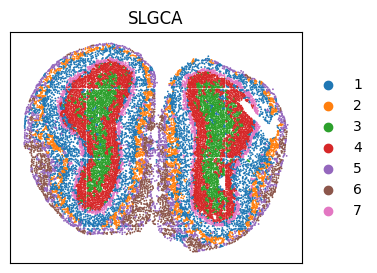

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(4*1,3))
sc.pl.spatial(adata, color='SLGCA', spot_size=40, show=False, ax=ax)
ax.invert_yaxis()
ax.set_title('SLGCA')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

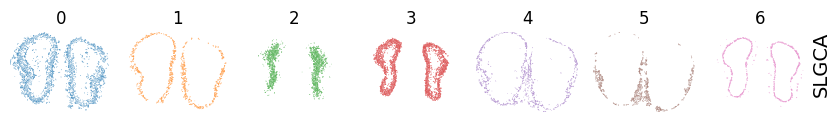

In [6]:
fig, axes = plt.subplots(1,7,figsize=(1.7*5, 1.5*2), sharex=True, sharey=True)
axes = axes.ravel()
n_clusters = 7
for i in range(n_clusters):
    sub = adata[adata.obs['SLGCA'] == i+1]
    sc.pl.spatial(sub, spot_size=30, color='SLGCA', ax=axes[i], legend_loc=None, show=False)
    axes[i].set_title(i)


xmin = adata.obsm['spatial'][:, 0].min()
xmax = adata.obsm['spatial'][:, 0].max()
ymin = adata.obsm['spatial'][:, 1].min()
ymax = adata.obsm['spatial'][:, 1].max()

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
plt.text(1.1, 0.6, 'SLGCA', fontsize=14, ha='center', va='center', transform=ax.transAxes, rotation=90)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.tight_layout()